In [ ]:
# Start writing code here...
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/370_project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Read in CSV files and add Year column to identify each team's year
year_2013 = pd.read_csv("370_project/cfb13.csv")
year_2013["Year"] = 2013
year_2014 = pd.read_csv("370_project/cfb14.csv")
year_2014["Year"] = 2014
year_2015 = pd.read_csv("370_project/cfb15.csv")
year_2015["Year"] = 2015
year_2016 = pd.read_csv("370_project/cfb16.csv")
year_2016["Year"] = 2016
year_2017 = pd.read_csv("370_project/cfb17.csv")
year_2017["Year"] = 2017
year_2018 = pd.read_csv("370_project/cfb18.csv")
year_2018["Year"] = 2018
year_2019 = pd.read_csv("370_project/cfb19.csv")
year_2019["Year"] = 2019
year_2020 = pd.read_csv("370_project/cfb20.csv")
year_2020["Year"] = 2020

In [ ]:
year_13_and_14 = pd.concat([year_2013, year_2014])
year_13_to_15 = pd.concat([year_13_and_14, year_2015])
year_13_to_16 = pd.concat([year_13_to_15, year_2016])
year_13_to_17 = pd.concat([year_13_to_16, year_2017])
year_13_to_18 = pd.concat([year_13_to_17, year_2018])
year_13_to_19 = pd.concat([year_13_to_18, year_2019])
all_years = pd.concat([year_13_to_19, year_2020])


In [ ]:
all_years['Conference']=all_years['Team'].str.split('(', expand = True)[1].str.strip(' )')
all_years['Team']=all_years['Team'].str.split('(', expand = True)[0].str.strip()


In [ ]:
all_years.loc[all_years.Conference.isin(['Mountain West']),'Conference'] = 'MWC'
all_years.head()

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Avg.Turnover.Margin.per.Game,Year,...40,Kickoff.Return.Def.Rank,Opp.Kickoff.Returns,Kickoff.Touchbacks,Opponent.Kickoff.Return.Yards,Opp.Kickoff.Return.Touchdowns.Allowed,Avg.Yards.per.Kickoff.Return.Allowed,Conference
0,Akron,12,5,7,106,837,4104,4.90,30,31.0,...,-0.17,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MAC
1,Alabama,13,11,2,33,826,5903,7.15,58,65.0,...,0.15,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEC
2,Arizona,13,8,5,31,1030,5960,5.79,52,57.0,...,0.31,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pac-12
3,Arizona St.,14,10,4,32,1102,6402,5.81,64,69.0,...,1.07,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pac-12
4,Arkansas,12,3,9,99,775,4286,5.53,29,30.0,...,-0.75,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEC


In [ ]:
all_years.corr()

,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,Off.Yards.per.Game,...,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year,...40,Kickoff.Return.Def.Rank,Opp.Kickoff.Returns,Kickoff.Touchbacks,Opponent.Kickoff.Return.Yards,Opp.Kickoff.Return.Touchdowns.Allowed,Avg.Yards.per.Kickoff.Return.Allowed
Games,1.000000,0.572981,0.006188,-0.172457,0.903381,0.757213,0.194910,0.598112,0.429018,0.210847,...,0.177655,0.159837,-0.454284,-0.107435,-0.045229,0.455502,0.439900,0.443531,0.029416,-0.107435
Win,0.572981,1.000000,-0.816007,-0.551086,0.566026,0.740957,0.617060,0.787186,0.444665,0.572521,...,0.578778,0.562373,-0.150414,-0.152720,-0.146666,0.421109,0.523739,0.381647,-0.058993,-0.152720
Loss,0.006188,-0.816007,1.000000,0.550762,-0.053471,-0.370003,-0.615424,-0.538621,-0.424070,-0.549840,...,-0.580885,-0.573436,-0.136881,0.096550,0.141265,-0.132812,-0.271246,-0.094637,0.096703,0.096550
Off.Rank,-0.172457,-0.551086,0.550762,1.000000,-0.398265,-0.742835,-0.855544,-0.777667,-0.629812,-0.960775,...,-0.246905,-0.250965,0.012947,0.048493,0.054979,-0.349943,-0.336588,-0.338951,-0.042148,0.048493
Off.Plays,0.903381,0.566026,-0.053471,-0.398265,1.000000,0.851929,0.244245,0.673372,0.523829,0.441210,...,0.164905,0.150296,-0.466405,-0.085131,-0.024595,0.497868,0.436987,0.492803,0.066888,-0.085131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Opp.Kickoff.Returns,0.455502,0.421109,-0.132812,-0.349943,0.497868,0.549133,0.331634,0.533992,NaN,0.378741,...,0.200601,0.191403,-0.504152,-0.177584,-0.135652,1.000000,-0.280880,0.962233,0.158745,-0.177584
Kickoff.Touchbacks,0.439900,0.523739,-0.271246,-0.336588,0.436987,0.538002,0.384950,0.523035,NaN,0.370458,...,0.230324,0.216111,-0.126532,0.059105,0.056943,-0.280880,1.000000,-0.266487,-0.143741,0.059105
Opponent.Kickoff.Return.Yards,0.443531,0.381647,-0.094637,-0.338951,0.492803,0.532777,0.307567,0.500534,NaN,0.366110,...,0.162513,0.155809,-0.503823,0.042242,0.113226,0.962233,-0.266487,1.000000,0.256751,0.042242
Opp.Kickoff.Return.Touchdowns.Allowed,0.029416,-0.058993,0.096703,-0.042148,0.066888,0.049473,-0.012296,0.030700,NaN,0.042005,...,-0.056692,-0.062665,-0.063237,0.344005,0.344490,0.158745,-0.143741,0.256751,1.000000,0.344005


In [ ]:
partial = all_years[(all_years['Year'] >= 2016)]

In [ ]:
partial

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Avg.Turnover.Margin.per.Game,Year,...40,Kickoff.Return.Def.Rank,Opp.Kickoff.Returns,Kickoff.Touchbacks,Opponent.Kickoff.Return.Yards,Opp.Kickoff.Return.Touchdowns.Allowed,Avg.Yards.per.Kickoff.Return.Allowed,Conference
0,Akron,12,5,7,84,776,4649,5.99,38,NaN,...,-0.67,2016,21.16,77.0,56.0,8.0,1185.0,0.0,21.16,MAC
1,Alabama,15,14,1,34,1056,6829,6.47,59,NaN,...,0.67,2016,21.26,79.0,57.0,52.0,1212.0,0.0,21.26,SEC
2,Appalachian St.,13,10,3,52,912,5589,6.13,45,NaN,...,0.62,2016,23.81,114.0,27.0,48.0,643.0,0.0,23.81,Sun Belt
3,Arizona,12,3,9,67,815,4957,6.08,39,NaN,...,-0.58,2016,19.17,34.0,35.0,20.0,671.0,0.0,19.17,Pac-12
4,Arizona St.,12,5,7,81,900,4689,5.21,43,NaN,...,-0.33,2016,25.95,125.0,19.0,60.0,493.0,2.0,25.95,Pac-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,West Virginia,9,5,4,42,690,3804,5.51,28,NaN,...,0.33,2020,19.06,41.0,34.0,7.0,648.0,1.0,19.06,Big 12
123,Western Ky.,11,5,6,120,699,3200,4.58,21,NaN,...,-0.27,2020,21.10,66.0,21.0,18.0,443.0,1.0,21.10,C-USA
124,Western Mich.,6,4,2,15,392,2878,7.34,32,NaN,...,-0.50,2020,19.95,49.0,22.0,15.0,439.0,0.0,19.95,MAC
125,Wisconsin,6,3,3,93,431,2153,5.00,17,NaN,...,-0.50,2020,21.08,63.0,13.0,11.0,274.0,0.0,21.08,Big Ten


In [ ]:
B1G = partial[(partial['Conference'] == "Big Ten")]

In [ ]:
bigten = pd.read_csv('370_project/bigten.csv')
bigten

,Team,Conference Division
0,Illinois,Big Ten West
1,Iowa,Big Ten West
2,Indiana,Big Ten East
3,Michigan,Big Ten East
4,Michigan St.,Big Ten East
5,Minnesota,Big Ten West
6,Ohio St.,Big Ten East
7,Nebraska,Big Ten West
8,Northwestern,Big Ten West
9,Penn St.,Big Ten East


In [ ]:
sec_csv = pd.read_csv('370_project/sec.csv')
sec_csv

,Team,Conference Division
0,Alabama,SEC West
1,Arkansas,SEC West
2,Auburn,SEC West
3,Florida,SEC East
4,Georgia,SEC East
5,Kentucky,SEC East
6,LSU,SEC West
7,Mississippi St.,SEC West
8,Missouri,SEC East
9,Ole Miss,SEC West


In [ ]:
sec = partial[(partial['Conference'] == "SEC")]

In [ ]:
sec_csv

,Team,Conference Division
0,Alabama,SEC West
1,Arkansas,SEC West
2,Auburn,SEC West
3,Florida,SEC East
4,Georgia,SEC East
5,Kentucky,SEC East
6,LSU,SEC West
7,Mississippi St.,SEC West
8,Missouri,SEC East
9,Ole Miss,SEC West


In [ ]:
#reading in rankings from csv and creating a df out of them
rankings = pd.read_csv('370_project/rankings.csv')  
rankings.head()

,Team,Conference Division,Year,Ranking
0,Wisconsin,Big Ten West,2019,1
1,Minnesota,Big Ten West,2019,2
2,Iowa,Big Ten West,2019,3
3,Illinois,Big Ten West,2019,4
4,Purdue,Big Ten West,2019,5


In [ ]:
partial.head()

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,...,Avg.Turnover.Margin.per.Game,Year,...40,Kickoff.Return.Def.Rank,Opp.Kickoff.Returns,Kickoff.Touchbacks,Opponent.Kickoff.Return.Yards,Opp.Kickoff.Return.Touchdowns.Allowed,Avg.Yards.per.Kickoff.Return.Allowed,Conference
0,Akron,12,5,7,84,776,4649,5.99,38,NaN,...,-0.67,2016,21.16,77.0,56.0,8.0,1185.0,0.0,21.16,MAC
1,Alabama,15,14,1,34,1056,6829,6.47,59,NaN,...,0.67,2016,21.26,79.0,57.0,52.0,1212.0,0.0,21.26,SEC
2,Appalachian St.,13,10,3,52,912,5589,6.13,45,NaN,...,0.62,2016,23.81,114.0,27.0,48.0,643.0,0.0,23.81,Sun Belt
3,Arizona,12,3,9,67,815,4957,6.08,39,NaN,...,-0.58,2016,19.17,34.0,35.0,20.0,671.0,0.0,19.17,Pac-12
4,Arizona St.,12,5,7,81,900,4689,5.21,43,NaN,...,-0.33,2016,25.95,125.0,19.0,60.0,493.0,2.0,25.95,Pac-12


In [ ]:
partial['Team'] = partial['Team'].str.strip()

merged_df = partial.merge(rankings, how='inner', left_on=["Team", "Year"], right_on=["Team","Year"])

merged_df.dropna(subset = ["Ranking"], inplace=True)

In [ ]:
# makes sure that all the rankings are carried over and there are no naming differences

print(partial['Team'].unique())
# print(merged_df['Team'].unique())
# print(rankings['Team'].unique())
test = merged_df.merge(rankings, how='right', left_on=["Team", "Year"], right_on=["Team","Year"], indicator=True)
right = test[test['_merge'] == "right_only"]
print(right['Team'].unique())

['Akron' 'Alabama' 'Appalachian St.' 'Arizona' 'Arizona St.' 'Arkansas'
 'Arkansas St.' 'Army West Point' 'Auburn' 'Ball St.' 'Baylor'
 'Boston College' 'Bowling Green' 'Buffalo' 'BYU' 'California'
 'Central Mich.' 'Charlotte' 'Cincinnati' 'Clemson' 'Colorado' 'Duke'
 'East Carolina' 'Eastern Mich.' 'FIU' 'Fla. Atlantic' 'Florida'
 'Florida St.' 'Ga. Southern' 'Georgia' 'Georgia St.' 'Georgia Tech'
 'Houston' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Iowa St.' 'Kansas'
 'Kansas St.' 'Kent St.' 'Kentucky' 'La.-Monroe' 'Louisiana'
 'Louisiana Tech' 'Louisville' 'LSU' 'Marshall' 'Maryland' 'Massachusetts'
 'Memphis' 'Miami' 'Michigan' 'Michigan St.' 'Middle Tenn.' 'Minnesota'
 'Mississippi St.' 'Missouri' 'Navy' 'NC State' 'Nebraska'
 'New Mexico St.' 'North Carolina' 'North Texas' 'Northern Ill.'
 'Northwestern' 'Notre Dame' 'Ohio' 'Ohio St.' 'Oklahoma' 'Oklahoma St.'
 'Old Dominion' 'Ole Miss' 'Oregon' 'Oregon St.' 'Penn St.' 'Pittsburgh'
 'Purdue' 'Rice' 'Rutgers' 'SMU' 'South Alabama' 'Sou

In [ ]:
# isolating Michigan for Ranking and Statistics & Merging them together to run stats
# this worked for my local computer but we may need to change for it to universally work

umich_stats = partial.loc[partial["Team"] == "Michigan"]
umich_stats = umich_stats.loc[umich_stats["Year"] >= 2016]
umich_rank = rankings.loc[rankings["Team"] == "Michigan"]
umich = pd.merge(umich_stats, umich_rank, on = "Year")
umich.drop(columns={"Team_x"})
umich = umich.rename(columns={"Team_y": "Team"})
umich = umich.sort_values(by = "Ranking")


# figuring out correlation between ranking and other variables
# I have output on my computer I can show with all of the stats
# negative correlation means that it is associated with a better rank (higher quantity of varible means lower rank)
umich_ranking_corr = umich.corr()["Ranking"]
umich_ranking_corr = umich_ranking_corr.sort_values()
umich_ranking_corr = pd.DataFrame(umich_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
umich_ranking_corr = umich_ranking_corr.rename(columns={"Ranking": "Michigan Ranking"})
umich_ranking_corr

# figuring out correlation between osu ranking and other variables to find overlap with Michigan 
# to find important variables
osu_stats = partial.loc[partial["Team"] == "Ohio St."]
osu_stats = osu_stats.loc[osu_stats["Year"] >= 2016]

osu_rank = rankings.loc[rankings["Team"] == "Ohio St."]
osu_rank = osu_rank.sort_values(by = "Ranking")


osu = pd.merge(osu_stats, osu_rank, on = "Year")
osu.drop(columns={"Team_x"})
osu = osu.rename(columns={"Team_y": "Team"})
osu = osu.sort_values(by = "Ranking")


osu_ranking_corr = osu.corr()["Ranking"]
osu_ranking_corr = osu_ranking_corr.sort_values()
osu_ranking_corr = pd.DataFrame(osu_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
osu_ranking_corr = osu_ranking_corr.rename(columns={"Ranking": "Ohio State Ranking"})
osu_ranking_corr


# Michigan State ranking correlation
msu_stats = partial.loc[partial["Team"] == "Michigan St."]
msu_stats = msu_stats.loc[msu_stats["Year"] >= 2016]

msu_rank = rankings.loc[rankings["Team"] == "Michigan St."]
msu_rank = msu_rank.sort_values(by = "Ranking")


msu = pd.merge(msu_stats, msu_rank, on = "Year")
msu.drop(columns={"Team_x"})
msu = msu.rename(columns={"Team_y": "Team"})
msu = msu.sort_values(by = "Ranking")


msu_ranking_corr = msu.corr()["Ranking"]
msu_ranking_corr = msu_ranking_corr.sort_values()
msu_ranking_corr = pd.DataFrame(msu_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
msu_ranking_corr = msu_ranking_corr.rename(columns={"Ranking": "Michigan State Ranking"})
msu_ranking_corr

# Wisconsin Stats and Rank
wisco_stats = partial.loc[partial["Team"] == "Wisconsin"]
wisco_stats = wisco_stats.loc[wisco_stats["Year"] >= 2016]

wisco_rank = rankings.loc[rankings["Team"] == "Wisconsin"]
wisco_rank = wisco_rank.sort_values(by = "Ranking")


wisco = pd.merge(wisco_stats, wisco_rank, on = "Year")
wisco.drop(columns={"Team_x"})
wisco = wisco.rename(columns={"Team_y": "Team"})
wisco = wisco.sort_values(by = "Ranking")


wisco_ranking_corr = wisco.corr()["Ranking"]
wisco_ranking_corr = wisco_ranking_corr.sort_values()
wisco_ranking_corr = pd.DataFrame(wisco_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
wisco_ranking_corr = wisco_ranking_corr.rename(columns={"Ranking": "Wisconsin Ranking"})

# Minnesota Stats and Ranking
minnesota_stats = partial.loc[partial["Team"] == "Minnesota"]
minnesota_stats = minnesota_stats.loc[minnesota_stats["Year"] >= 2016]

minnesota_rank = rankings.loc[rankings["Team"] == "Minnesota"]
minnesota_rank = minnesota_rank.sort_values(by = "Ranking")


minnesota = pd.merge(minnesota_stats, minnesota_rank, on = "Year")
minnesota.drop(columns={"Team_x"})
minnesota = minnesota.rename(columns={"Team_y": "Team"})
minnesota = minnesota.sort_values(by = "Ranking")


minnesota_ranking_corr = minnesota.corr()["Ranking"]
minnesota_ranking_corr = minnesota_ranking_corr.sort_values()
minnesota_ranking_corr = pd.DataFrame(minnesota_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
minnesota_ranking_corr = minnesota_ranking_corr.rename(columns={"Ranking": "Minnesota Ranking"})
minnesota_ranking_corr

# Iowa Stats and Ranking
iowa_stats = partial.loc[partial["Team"] == "Iowa"]
iowa_stats = iowa_stats.loc[iowa_stats["Year"] >= 2016]

iowa_rank = rankings.loc[rankings["Team"] == "Iowa"]
iowa_rank = iowa_rank.sort_values(by = "Ranking")


iowa = pd.merge(iowa_stats, iowa_rank, on = "Year")
iowa.drop(columns={"Team_x"})
iowa = iowa.rename(columns={"Team_y": "Team"})
iowa = iowa.sort_values(by = "Ranking")


iowa_ranking_corr = iowa.corr()["Ranking"]
iowa_ranking_corr = iowa_ranking_corr.sort_values()
iowa_ranking_corr = pd.DataFrame(iowa_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
iowa_ranking_corr = iowa_ranking_corr.rename(columns={"Ranking": "Iowa Ranking"})


# Illinois Stats and Ranking
illinois_stats = partial.loc[partial["Team"] == "Illinois"]
illinois_stats = illinois_stats.loc[illinois_stats["Year"] >= 2016]

illinois_rank = rankings.loc[rankings["Team"] == "Illinois"]
illinois_rank = illinois_rank.sort_values(by = "Ranking")


illinois = pd.merge(illinois_stats, illinois_rank, on = "Year")
illinois.drop(columns={"Team_x"})
illinois = illinois.rename(columns={"Team_y": "Team"})
illinois = illinois.sort_values(by = "Ranking")


illinois_ranking_corr = illinois.corr()["Ranking"]
illinois_ranking_corr = illinois_ranking_corr.sort_values()
illinois_ranking_corr = pd.DataFrame(illinois_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
illinois_ranking_corr = illinois_ranking_corr.rename(columns={"Ranking": "Illinois Ranking"})

# Purdue Stats and Ranking
purdue_stats = partial.loc[partial["Team"] == "Purdue"]
purdue_stats = purdue_stats.loc[purdue_stats["Year"] >= 2016]

purdue_rank = rankings.loc[rankings["Team"] == "Purdue"]
purdue_rank = purdue_rank.sort_values(by = "Ranking")


purdue = pd.merge(purdue_stats, purdue_rank, on = "Year")
purdue.drop(columns={"Team_x"})
purdue = purdue.rename(columns={"Team_y": "Team"})
purdue = purdue.sort_values(by = "Ranking")


purdue_ranking_corr = purdue.corr()["Ranking"]
purdue_ranking_corr = purdue_ranking_corr.sort_values()
purdue_ranking_corr = pd.DataFrame(purdue_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
purdue_ranking_corr = purdue_ranking_corr.rename(columns={"Ranking": "Purdue Ranking"})

# Nebraska Stats and Ranking
nebraska_stats = partial.loc[partial["Team"] == "Nebraska"]
nebraska_stats = nebraska_stats.loc[nebraska_stats["Year"] >= 2016]

nebraska_rank = rankings.loc[rankings["Team"] == "Nebraska"]
nebraska_rank = nebraska_rank.sort_values(by = "Ranking")


nebraska = pd.merge(nebraska_stats, nebraska_rank, on = "Year")
nebraska.drop(columns={"Team_x"})
nebraska = nebraska.rename(columns={"Team_y": "Team"})
nebraska = nebraska.sort_values(by = "Ranking")


nebraska_ranking_corr = nebraska.corr()["Ranking"]
nebraska_ranking_corr = nebraska_ranking_corr.sort_values()
nebraska_ranking_corr = pd.DataFrame(nebraska_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
nebraska_ranking_corr = nebraska_ranking_corr.rename(columns={"Ranking": "Nebraska Ranking"})


# Penn State Stats and Ranking
psu_stats = partial.loc[partial["Team"] == "Penn St."]
psu_stats = psu_stats.loc[psu_stats["Year"] >= 2016]

psu_rank = rankings.loc[rankings["Team"] == "Penn St."]
psu_rank = psu_rank.sort_values(by = "Ranking")


psu = pd.merge(psu_stats, psu_rank, on = "Year")
psu.drop(columns={"Team_x"})
psu = psu.rename(columns={"Team_y": "Team"})
psu = psu.sort_values(by = "Ranking")


psu_ranking_corr = psu.corr()["Ranking"]
psu_ranking_corr = psu_ranking_corr.sort_values()
psu_ranking_corr = pd.DataFrame(psu_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
psu_ranking_corr = psu_ranking_corr.rename(columns={"Ranking": "Penn State Ranking"})


# Northwestern Stats and Ranking
northwestern_stats = partial.loc[partial["Team"] == "Northwestern"]
northwestern_stats = northwestern_stats.loc[northwestern_stats["Year"] >= 2016]

northwestern_rank = rankings.loc[rankings["Team"] == "Northwestern"]
northwestern_rank = northwestern_rank.sort_values(by = "Ranking")


northwestern = pd.merge(northwestern_stats, northwestern_rank, on = "Year")
northwestern.drop(columns={"Team_x"})
northwestern = northwestern.rename(columns={"Team_y": "Team"})
northwestern = northwestern.sort_values(by = "Ranking")


northwestern_ranking_corr = northwestern.corr()["Ranking"]
northwestern_ranking_corr = northwestern_ranking_corr.sort_values()
northwestern_ranking_corr = pd.DataFrame(northwestern_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
northwestern_ranking_corr = northwestern_ranking_corr.rename(columns={"Ranking": "Northwestern Ranking"})

# Indiana Stats and Ranking
indiana_stats = partial.loc[partial["Team"] == "Indiana"]
indiana_stats = indiana_stats.loc[indiana_stats["Year"] >= 2016]

indiana_rank = rankings.loc[rankings["Team"] == "Indiana"]
indiana_rank = indiana_rank.sort_values(by = "Ranking")


indiana = pd.merge(indiana_stats, indiana_rank, on = "Year")
indiana.drop(columns={"Team_x"})
indiana = indiana.rename(columns={"Team_y": "Team"})
indiana = indiana.sort_values(by = "Ranking")


indiana_ranking_corr = indiana.corr()["Ranking"]
indiana_ranking_corr = indiana_ranking_corr.sort_values()
indiana_ranking_corr = pd.DataFrame(indiana_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
indiana_ranking_corr = indiana_ranking_corr.rename(columns={"Ranking": "Indiana Ranking"})


# Rutgers Stats and Ranking
rutgers_stats = partial.loc[partial["Team"] == "Rutgers"]
rutgers_stats = rutgers_stats.loc[rutgers_stats["Year"] >= 2016]

rutgers_rank = rankings.loc[rankings["Team"] == "Rutgers"]
rutgers_rank = rutgers_rank.sort_values(by = "Ranking")


rutgers = pd.merge(rutgers_stats, rutgers_rank, on = "Year")
rutgers.drop(columns={"Team_x"})
rutgers = rutgers.rename(columns={"Team_y": "Team"})
rutgers = rutgers.sort_values(by = "Ranking")


rutgers_ranking_corr = rutgers.corr()["Ranking"]
rutgers_ranking_corr = rutgers_ranking_corr.sort_values()
rutgers_ranking_corr = pd.DataFrame(rutgers_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
rutgers_ranking_corr = rutgers_ranking_corr.rename(columns={"Ranking": "Rutgers Ranking"})

# Maryland Stats and Ranking
maryland_stats = partial.loc[partial["Team"] == "Maryland"]
maryland_stats = maryland_stats.loc[maryland_stats["Year"] >= 2016]

maryland_rank = rankings.loc[rankings["Team"] == "Maryland"]
maryland_rank = maryland_rank.sort_values(by = "Ranking")


maryland = pd.merge(maryland_stats, maryland_rank, on = "Year")
maryland.drop(columns={"Team_x"})
maryland = maryland.rename(columns={"Team_y": "Team"})
maryland = maryland.sort_values(by = "Ranking")


maryland_ranking_corr = maryland.corr()["Ranking"]
maryland_ranking_corr = maryland_ranking_corr.sort_values()
maryland_ranking_corr = pd.DataFrame(maryland_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
maryland_ranking_corr = maryland_ranking_corr.rename(columns={"Ranking": "Maryland Ranking"})




In [ ]:
# Big Ten Totals
umich_ranking_corr2 = umich_ranking_corr.copy()
umich_ranking_corr2 = umich_ranking_corr2.reset_index()
umich_ranking_corr2 = umich_ranking_corr2.rename(columns={"index":"Category"})

osu_ranking_corr2 = osu_ranking_corr.copy()
osu_ranking_corr2 = osu_ranking_corr2.reset_index()
osu_ranking_corr2 = osu_ranking_corr2.rename(columns={"index":"Category"})

msu_ranking_corr2 = msu_ranking_corr.copy()
msu_ranking_corr2 = msu_ranking_corr2.reset_index()
msu_ranking_corr2 = msu_ranking_corr2.rename(columns={"index":"Category"})

wisco_ranking_corr2 = wisco_ranking_corr.copy()
wisco_ranking_corr2 = wisco_ranking_corr2.reset_index()
wisco_ranking_corr2 = wisco_ranking_corr2.rename(columns={"index":"Category"})

indiana_ranking_corr2 = indiana_ranking_corr.copy()
indiana_ranking_corr2 = indiana_ranking_corr2.reset_index()
indiana_ranking_corr2 = indiana_ranking_corr2.rename(columns={"index":"Category"})

purdue_ranking_corr2 = purdue_ranking_corr.copy()
purdue_ranking_corr2 = purdue_ranking_corr2.reset_index()
purdue_ranking_corr2 = purdue_ranking_corr2.rename(columns={"index":"Category"})

psu_ranking_corr2 = psu_ranking_corr.copy()
psu_ranking_corr2 = psu_ranking_corr2.reset_index()
psu_ranking_corr2 = psu_ranking_corr2.rename(columns={"index":"Category"})

maryland_ranking_corr2 = maryland_ranking_corr.copy()
maryland_ranking_corr2 = maryland_ranking_corr2.reset_index()
maryland_ranking_corr2 = maryland_ranking_corr2.rename(columns={"index":"Category"})

northwestern_ranking_corr2 = northwestern_ranking_corr.copy()
northwestern_ranking_corr2 = northwestern_ranking_corr2.reset_index()
northwestern_ranking_corr2 = northwestern_ranking_corr2.rename(columns={"index":"Category"})

minnesota_ranking_corr2 = minnesota_ranking_corr.copy()
minnesota_ranking_corr2 = minnesota_ranking_corr2.reset_index()
minnesota_ranking_corr2 = minnesota_ranking_corr2.rename(columns={"index":"Category"})

illinois_ranking_corr2 = illinois_ranking_corr.copy()
illinois_ranking_corr2 = illinois_ranking_corr2.reset_index()
illinois_ranking_corr2 = illinois_ranking_corr2.rename(columns={"index":"Category"})

iowa_ranking_corr2 = iowa_ranking_corr.copy()
iowa_ranking_corr2 = iowa_ranking_corr2.reset_index()
iowa_ranking_corr2 = iowa_ranking_corr2.rename(columns={"index":"Category"})

rutgers_ranking_corr2 = rutgers_ranking_corr.copy()
rutgers_ranking_corr2 = rutgers_ranking_corr2.reset_index()
rutgers_ranking_corr2 = rutgers_ranking_corr2.rename(columns={"index":"Category"})

nebraska_ranking_corr2 = nebraska_ranking_corr.copy()
nebraska_ranking_corr2 = nebraska_ranking_corr2.reset_index()
nebraska_ranking_corr2 = nebraska_ranking_corr2.rename(columns={"index":"Category"})

big_ten_rankings = pd.merge(umich_ranking_corr2, osu_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, msu_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, wisco_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, nebraska_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, northwestern_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, indiana_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, illinois_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, rutgers_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, iowa_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, minnesota_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, maryland_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, psu_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, purdue_ranking_corr2)

big_ten_rankings["Total Weight of Category"] = (big_ten_rankings["Michigan Ranking"] 
                                            + big_ten_rankings["Ohio State Ranking"]
                                            + big_ten_rankings["Michigan State Ranking"] 
                                            + big_ten_rankings["Wisconsin Ranking"]
                                            + big_ten_rankings["Purdue Ranking"]
                                            + big_ten_rankings["Minnesota Ranking"]
                                            + big_ten_rankings["Iowa Ranking"]
                                            + big_ten_rankings["Illinois Ranking"]
                                            + big_ten_rankings["Maryland Ranking"]
                                            + big_ten_rankings["Indiana Ranking"]
                                            + big_ten_rankings["Northwestern Ranking"]
                                            + big_ten_rankings["Penn State Ranking"]
                                            + big_ten_rankings["Rutgers Ranking"]
                                            + big_ten_rankings["Nebraska Ranking"])/ 14


big_ten_rankings = big_ten_rankings.sort_values(by = "Total Weight of Category")

big_ten_rankings = big_ten_rankings.dropna()
big_ten_rankings

big_ten_average_rankings = big_ten_rankings.drop(columns=["Michigan Ranking", 
"Ohio State Ranking", "Michigan State Ranking", "Wisconsin Ranking", "Purdue Ranking", 
"Minnesota Ranking", "Iowa Ranking", "Illinois Ranking", "Maryland Ranking", "Indiana Ranking",
"Northwestern Ranking", "Penn State Ranking", "Rutgers Ranking", "Nebraska Ranking"])
#big_ten_average_rankings

In [ ]:
# SEC 

# Alabama Stats and Rank
bama_stats = partial.loc[partial["Team"] == "Alabama"]
bama_stats = bama_stats.loc[bama_stats["Year"] >= 2016]

bama_rank = rankings.loc[rankings["Team"] == "Alabama"]
bama_rank = bama_rank.sort_values(by = "Ranking")


bama = pd.merge(bama_stats, bama_rank, on = "Year")
bama.drop(columns={"Team_x"})
bama = bama.rename(columns={"Team_y": "Team"})
bama = bama.sort_values(by = "Ranking")


bama_ranking_corr = bama.corr()["Ranking"]
bama_ranking_corr = bama_ranking_corr.sort_values()
bama_ranking_corr = pd.DataFrame(bama_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
bama_ranking_corr = bama_ranking_corr.rename(columns={"Ranking": "Alabama Ranking"})



# Florida Stats and Rank
florida_stats = partial.loc[partial["Team"] == "Florida"]
florida_stats = florida_stats.loc[florida_stats["Year"] >= 2016]

florida_rank = rankings.loc[rankings["Team"] == "Florida"]
florida_rank = florida_rank.sort_values(by = "Ranking")


florida = pd.merge(florida_stats, florida_rank, on = "Year")
florida.drop(columns={"Team_x"})
florida = florida.rename(columns={"Team_y": "Team"})
florida = florida.sort_values(by = "Ranking")


florida_ranking_corr = florida.corr()["Ranking"]
florida_ranking_corr = florida_ranking_corr.sort_values()
florida_ranking_corr = pd.DataFrame(florida_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
florida_ranking_corr = florida_ranking_corr.rename(columns={"Ranking": "Florida Ranking"})



# Auburn Stats and Rank
auburn_stats = partial.loc[partial["Team"] == "Auburn"]
auburn_stats = auburn_stats.loc[auburn_stats["Year"] >= 2016]

auburn_rank = rankings.loc[rankings["Team"] == "Auburn"]
auburn_rank = auburn_rank.sort_values(by = "Ranking")


auburn = pd.merge(auburn_stats, auburn_rank, on = "Year")
auburn.drop(columns={"Team_x"})
auburn = auburn.rename(columns={"Team_y": "Team"})
auburn = auburn.sort_values(by = "Ranking")


auburn_ranking_corr = auburn.corr()["Ranking"]
auburn_ranking_corr = auburn_ranking_corr.sort_values()
auburn_ranking_corr = pd.DataFrame(auburn_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
auburn_ranking_corr = auburn_ranking_corr.rename(columns={"Ranking": "Auburn Ranking"})


# Georgia Stats and Rank
georgia_stats = partial.loc[partial["Team"] == "Georgia"]
georgia_stats = georgia_stats.loc[georgia_stats["Year"] >= 2016]

georgia_rank = rankings.loc[rankings["Team"] == "Georgia"]
georgia_rank = georgia_rank.sort_values(by = "Ranking")


georgia = pd.merge(georgia_stats, georgia_rank, on = "Year")
georgia.drop(columns={"Team_x"})
georgia = georgia.rename(columns={"Team_y": "Team"})
georgia = georgia.sort_values(by = "Ranking")


georgia_ranking_corr = georgia.corr()["Ranking"]
georgia_ranking_corr = georgia_ranking_corr.sort_values()
georgia_ranking_corr = pd.DataFrame(georgia_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
georgia_ranking_corr = georgia_ranking_corr.rename(columns={"Ranking": "Georgia Ranking"})


# Tennessee Stats and Rank
tennessee_stats = partial.loc[partial["Team"] == "Tennessee"]
tennessee_stats = tennessee_stats.loc[tennessee_stats["Year"] >= 2016]

tennessee_rank = rankings.loc[rankings["Team"] == "Tennessee"]
tennessee_rank = tennessee_rank.sort_values(by = "Ranking")


tennessee = pd.merge(tennessee_stats, tennessee_rank, on = "Year")
tennessee.drop(columns={"Team_x"})
tennessee = tennessee.rename(columns={"Team_y": "Team"})
tennessee = tennessee.sort_values(by = "Ranking")


tennessee_ranking_corr = tennessee.corr()["Ranking"]
tennessee_ranking_corr = tennessee_ranking_corr.sort_values()
tennessee_ranking_corr = pd.DataFrame(tennessee_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
tennessee_ranking_corr = tennessee_ranking_corr.rename(columns={"Ranking": "Tennessee Ranking"})


# Missouri Stats and Rank
missouri_stats = partial.loc[partial["Team"] == "Missouri"]
missouri_stats = missouri_stats.loc[missouri_stats["Year"] >= 2016]

missouri_rank = rankings.loc[rankings["Team"] == "Missouri"]
missouri_rank = missouri_rank.sort_values(by = "Ranking")


missouri = pd.merge(missouri_stats, missouri_rank, on = "Year")
missouri.drop(columns={"Team_x"})
missouri = missouri.rename(columns={"Team_y": "Team"})
missouri = missouri.sort_values(by = "Ranking")


missouri_ranking_corr = missouri.corr()["Ranking"]
missouri_ranking_corr = missouri_ranking_corr.sort_values()
missouri_ranking_corr = pd.DataFrame(missouri_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
missouri_ranking_corr = missouri_ranking_corr.rename(columns={"Ranking": "Missouri Ranking"})


# Kentucky Stats and Rank
kentucky_stats = partial.loc[partial["Team"] == "Kentucky"]
kentucky_stats = kentucky_stats.loc[kentucky_stats["Year"] >= 2016]

kentucky_rank = rankings.loc[rankings["Team"] == "Kentucky"]
kentucky_rank = kentucky_rank.sort_values(by = "Ranking")


kentucky = pd.merge(kentucky_stats, kentucky_rank, on = "Year")
kentucky.drop(columns={"Team_x"})
kentucky = kentucky.rename(columns={"Team_y": "Team"})
kentucky = kentucky.sort_values(by = "Ranking")


kentucky_ranking_corr = kentucky.corr()["Ranking"]
kentucky_ranking_corr = kentucky_ranking_corr.sort_values()
kentucky_ranking_corr = pd.DataFrame(kentucky_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
kentucky_ranking_corr = kentucky_ranking_corr.rename(columns={"Ranking": "Kentucky Ranking"})


# South Carolina Stats and Rank
usc_stats = partial.loc[partial["Team"] == "South Carolina"]
usc_stats = usc_stats.loc[usc_stats["Year"] >= 2016]

usc_rank = rankings.loc[rankings["Team"] == "South Carolina"]
usc_rank = usc_rank.sort_values(by = "Ranking")


usc = pd.merge(usc_stats, usc_rank, on = "Year")
usc.drop(columns={"Team_x"})
usc = usc.rename(columns={"Team_y": "Team"})
usc = usc.sort_values(by = "Ranking")


usc_ranking_corr = usc.corr()["Ranking"]
usc_ranking_corr = usc_ranking_corr.sort_values()
usc_ranking_corr = pd.DataFrame(usc_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
usc_ranking_corr = usc_ranking_corr.rename(columns={"Ranking": "South Carolina Ranking"})


# Vanderbilt Stats and Rank
vanderbilt_stats = partial.loc[partial["Team"] == "Vanderbilt"]
vanderbilt_stats = vanderbilt_stats.loc[vanderbilt_stats["Year"] >= 2016]

vanderbilt_rank = rankings.loc[rankings["Team"] == "Vanderbilt"]
vanderbilt_rank = vanderbilt_rank.sort_values(by = "Ranking")


vanderbilt = pd.merge(vanderbilt_stats, vanderbilt_rank, on = "Year")
vanderbilt.drop(columns={"Team_x"})
vanderbilt = vanderbilt.rename(columns={"Team_y": "Team"})
vanderbilt = vanderbilt.sort_values(by = "Ranking")


vanderbilt_ranking_corr = vanderbilt.corr()["Ranking"]
vanderbilt_ranking_corr = vanderbilt_ranking_corr.sort_values()
vanderbilt_ranking_corr = pd.DataFrame(vanderbilt_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
vanderbilt_ranking_corr = vanderbilt_ranking_corr.rename(columns={"Ranking": "Vanderbilt Ranking"})


# LSU Stats and Rank
lsu_stats = partial.loc[partial["Team"] == "LSU"]
lsu_stats = lsu_stats.loc[lsu_stats["Year"] >= 2016]

lsu_rank = rankings.loc[rankings["Team"] == "LSU"]
lsu_rank = lsu_rank.sort_values(by = "Ranking")


lsu = pd.merge(lsu_stats, lsu_rank, on = "Year")
lsu.drop(columns={"Team_x"})
lsu = lsu.rename(columns={"Team_y": "Team"})
lsu = lsu.sort_values(by = "Ranking")


lsu_ranking_corr = lsu.corr()["Ranking"]
lsu_ranking_corr = lsu_ranking_corr.sort_values()
lsu_ranking_corr = pd.DataFrame(lsu_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
lsu_ranking_corr = lsu_ranking_corr.rename(columns={"Ranking": "LSU Ranking"})


# Texas A&M Stats and Rank
texasam_stats = partial.loc[partial["Team"] == "Texas A&M"]
texasam_stats = texasam_stats.loc[texasam_stats["Year"] >= 2016]

texasam_rank = rankings.loc[rankings["Team"] == "Texas A&M"]
texasam_rank = texasam_rank.sort_values(by = "Ranking")


texasam = pd.merge(texasam_stats, texasam_rank, on = "Year")
texasam.drop(columns={"Team_x"})
texasam = texasam.rename(columns={"Team_y": "Team"})
texasam = texasam.sort_values(by = "Ranking")


texasam_ranking_corr = texasam.corr()["Ranking"]
texasam_ranking_corr = texasam_ranking_corr.sort_values()
texasam_ranking_corr = pd.DataFrame(texasam_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
texasam_ranking_corr = texasam_ranking_corr.rename(columns={"Ranking": "Texas A&M Ranking"})


# Mississippi St. Stats and Rank
missst_stats = partial.loc[partial["Team"] == "Mississippi St."]
missst_stats = missst_stats.loc[missst_stats["Year"] >= 2016]

missst_rank = rankings.loc[rankings["Team"] == "Mississippi St."]
missst_rank = missst_rank.sort_values(by = "Ranking")


missst = pd.merge(missst_stats, missst_rank, on = "Year")
missst.drop(columns={"Team_x"})
missst = missst.rename(columns={"Team_y": "Team"})
missst = missst.sort_values(by = "Ranking")


missst_ranking_corr = missst.corr()["Ranking"]
missst_ranking_corr = missst_ranking_corr.sort_values()
missst_ranking_corr = pd.DataFrame(missst_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
missst_ranking_corr = missst_ranking_corr.rename(columns={"Ranking": "Mississippi St. Ranking"})


# Ole Miss Stats and Rank
olemiss_stats = partial.loc[partial["Team"] == "Ole Miss"]
olemiss_stats = olemiss_stats.loc[olemiss_stats["Year"] >= 2016]

olemiss_rank = rankings.loc[rankings["Team"] == "Ole Miss"]
olemiss_rank = olemiss_rank.sort_values(by = "Ranking")


olemiss = pd.merge(olemiss_stats, olemiss_rank, on = "Year")
olemiss.drop(columns={"Team_x"})
olemiss = olemiss.rename(columns={"Team_y": "Team"})
olemiss = olemiss.sort_values(by = "Ranking")


olemiss_ranking_corr = olemiss.corr()["Ranking"]
olemiss_ranking_corr = olemiss_ranking_corr.sort_values()
olemiss_ranking_corr = pd.DataFrame(olemiss_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
olemiss_ranking_corr = olemiss_ranking_corr.rename(columns={"Ranking": "Ole Miss Ranking"})


# Arkansas Stats and Rank
arkansas_stats = partial.loc[partial["Team"] == "Arkansas"]
arkansas_stats = arkansas_stats.loc[arkansas_stats["Year"] >= 2016]

arkansas_rank = rankings.loc[rankings["Team"] == "Arkansas"]
arkansas_rank = arkansas_rank.sort_values(by = "Ranking")


arkansas = pd.merge(arkansas_stats, arkansas_rank, on = "Year")
arkansas.drop(columns={"Team_x"})
arkansas = arkansas.rename(columns={"Team_y": "Team"})
arkansas = arkansas.sort_values(by = "Ranking")


arkansas_ranking_corr = arkansas.corr()["Ranking"]
arkansas_ranking_corr = arkansas_ranking_corr.sort_values()
arkansas_ranking_corr = pd.DataFrame(arkansas_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
arkansas_ranking_corr = arkansas_ranking_corr.rename(columns={"Ranking": "Arkansas Ranking"})




In [ ]:
# SEC Totals
bama_ranking_corr2 = bama_ranking_corr.copy()
bama_ranking_corr2 = bama_ranking_corr2.reset_index()
bama_ranking_corr2 = bama_ranking_corr2.rename(columns={"index":"Category"})

florida_ranking_corr2 = florida_ranking_corr.copy()
florida_ranking_corr2 = florida_ranking_corr2.reset_index()
florida_ranking_corr2 = florida_ranking_corr2.rename(columns={"index":"Category"})

auburn_ranking_corr2 = auburn_ranking_corr.copy()
auburn_ranking_corr2 = auburn_ranking_corr2.reset_index()
auburn_ranking_corr2 = auburn_ranking_corr2.rename(columns={"index":"Category"})

georgia_ranking_corr2 = georgia_ranking_corr.copy()
georgia_ranking_corr2 = georgia_ranking_corr2.reset_index()
georgia_ranking_corr2 = georgia_ranking_corr2.rename(columns={"index":"Category"})

tennessee_ranking_corr2 = tennessee_ranking_corr.copy()
tennessee_ranking_corr2 = tennessee_ranking_corr2.reset_index()
tennessee_ranking_corr2 = tennessee_ranking_corr2.rename(columns={"index":"Category"})

missouri_ranking_corr2 = missouri_ranking_corr.copy()
missouri_ranking_corr2 = missouri_ranking_corr2.reset_index()
missouri_ranking_corr2 = missouri_ranking_corr2.rename(columns={"index":"Category"})

kentucky_ranking_corr2 = kentucky_ranking_corr.copy()
kentucky_ranking_corr2 = kentucky_ranking_corr2.reset_index()
kentucky_ranking_corr2 = kentucky_ranking_corr2.rename(columns={"index":"Category"})

usc_ranking_corr2 = usc_ranking_corr.copy()
usc_ranking_corr2 = usc_ranking_corr2.reset_index()
usc_ranking_corr2 = usc_ranking_corr2.rename(columns={"index":"Category"})

vanderbilt_ranking_corr2 = vanderbilt_ranking_corr.copy()
vanderbilt_ranking_corr2 = vanderbilt_ranking_corr2.reset_index()
vanderbilt_ranking_corr2 = vanderbilt_ranking_corr2.rename(columns={"index":"Category"})

lsu_ranking_corr2 = lsu_ranking_corr.copy()
lsu_ranking_corr2 = lsu_ranking_corr2.reset_index()
lsu_ranking_corr2 = lsu_ranking_corr2.rename(columns={"index":"Category"})

texasam_ranking_corr2 = texasam_ranking_corr.copy()
texasam_ranking_corr2 = texasam_ranking_corr2.reset_index()
texasam_ranking_corr2 = texasam_ranking_corr2.rename(columns={"index":"Category"})

missst_ranking_corr2 = missst_ranking_corr.copy()
missst_ranking_corr2 = missst_ranking_corr2.reset_index()
missst_ranking_corr2 = missst_ranking_corr2.rename(columns={"index":"Category"})

olemiss_ranking_corr2 = olemiss_ranking_corr.copy()
olemiss_ranking_corr2 = olemiss_ranking_corr2.reset_index()
olemiss_ranking_corr2 = olemiss_ranking_corr2.rename(columns={"index":"Category"})

arkansas_ranking_corr2 = arkansas_ranking_corr.copy()
arkansas_ranking_corr2 = arkansas_ranking_corr2.reset_index()
arkansas_ranking_corr2 = arkansas_ranking_corr2.rename(columns={"index":"Category"})

sec_rankings = pd.merge(bama_ranking_corr2, florida_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, auburn_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, georgia_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, tennessee_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, missouri_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, kentucky_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, usc_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, vanderbilt_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, lsu_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, texasam_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, missst_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, olemiss_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, arkansas_ranking_corr2)

sec_rankings["Total Weight of Category"] = (sec_rankings["Alabama Ranking"] 
                                            + sec_rankings["Florida Ranking"]
                                            + sec_rankings["Auburn Ranking"] 
                                            + sec_rankings["Georgia Ranking"]
                                            + sec_rankings["Tennessee Ranking"]
                                            + sec_rankings["Missouri Ranking"]
                                            + sec_rankings["Kentucky Ranking"]
                                            + sec_rankings["South Carolina Ranking"]
                                            + sec_rankings["Vanderbilt Ranking"]
                                            + sec_rankings["LSU Ranking"]
                                            + sec_rankings["Texas A&M Ranking"]
                                            + sec_rankings["Mississippi St. Ranking"]
                                            + sec_rankings["Ole Miss Ranking"]
                                            + sec_rankings["Arkansas Ranking"])/ 14


sec_rankings = sec_rankings.sort_values(by = "Total Weight of Category")

sec_rankings = sec_rankings.dropna()
sec_rankings

sec_average_rankings = sec_rankings.drop(columns=["Alabama Ranking", 
"Florida Ranking", "Auburn Ranking", "Georgia Ranking", "Tennessee Ranking", 
"Missouri Ranking", "Kentucky Ranking", "South Carolina Ranking", "Vanderbilt Ranking", "LSU Ranking",
"Texas A&M Ranking", "Mississippi St. Ranking", "Ole Miss Ranking", "Arkansas Ranking"])
#sec_average_rankings
sec_rankings


,Category,Alabama Ranking,Florida Ranking,Auburn Ranking,Georgia Ranking,Tennessee Ranking,Missouri Ranking,Kentucky Ranking,South Carolina Ranking,Vanderbilt Ranking,LSU Ranking,Texas A&M Ranking,Mississippi St. Ranking,Ole Miss Ranking,Arkansas Ranking,Total Weight of Category
20,Win,-8.164966e-01,-8.665782e-01,-8.528029e-01,-0.925820,-9.169681e-01,-0.878310,0.000000,-0.888205,-8.660254e-01,-7.878386e-01,-1.000000e+00,-0.870388,0.000000,-0.916949,-0.756170
30,Redzone.Scores,-7.060631e-01,-3.330277e-01,-9.969278e-01,-0.998115,-8.372665e-01,-0.400862,-0.450835,0.142034,-9.367221e-01,-7.114556e-01,-7.661309e-01,-0.264820,0.513436,-0.869428,-0.544013
22,Opp.3rd.Attempt,-7.931448e-01,-8.885987e-01,-8.265430e-01,-0.829943,-7.830372e-01,0.059587,-0.958580,-0.546296,-9.240069e-01,-9.655402e-01,5.879485e-01,0.292334,0.210877,-0.748190,-0.508081
77,X3rd.Percent,-1.540957e-01,-9.706046e-01,-9.887344e-01,-0.490040,-8.283244e-01,0.037915,-0.647298,-0.433471,-4.880550e-01,-7.910324e-01,-9.701425e-01,-0.590440,0.834595,-0.430691,-0.493601
8,Opp.Pass.Attempts,-9.059422e-01,-7.047617e-01,-1.179992e-01,-0.860430,-7.175736e-01,0.074178,-0.455473,-0.963465,-7.901092e-01,-8.073557e-01,1.721695e-01,0.781305,-0.493464,-0.979199,-0.483437
45,Total.Points,-5.593026e-01,-5.792843e-01,-8.874697e-01,-0.885014,-6.287925e-01,-0.262154,-0.060589,-0.291018,-5.837273e-01,-8.406366e-01,-4.754938e-01,-0.092587,0.222069,-0.794282,-0.479877
39,Redzone.Field.Goals.Made,-5.962848e-01,-1.924501e-01,-4.447496e-01,-0.577350,-5.460535e-01,-0.852803,-0.915249,-0.477396,-6.248506e-01,-1.980295e-01,-7.071068e-01,-0.145741,0.080845,-0.225494,-0.458765
48,Redzone.Attempts,-5.449493e-01,-6.710275e-01,-7.912566e-01,-0.940875,-9.529375e-01,-0.199502,-0.174078,0.321860,-7.929518e-01,-5.392377e-01,-7.827249e-01,0.103833,0.668043,-0.956607,-0.446601
99,Pass.Yards.Attempt,7.524731e-02,-5.232667e-01,-5.555864e-01,-0.836465,-6.124036e-01,-0.135542,-0.951486,-0.299215,-3.676933e-01,-5.256152e-01,-2.296519e-01,0.185377,-0.306072,-0.847926,-0.423593
26,Off.Yards,-7.608685e-01,-6.390239e-01,-9.240580e-01,-0.854391,-7.961358e-01,0.134419,0.242975,0.181540,-5.720764e-01,-7.832166e-01,-6.610006e-01,0.672691,-0.149616,-0.959214,-0.419141


In [ ]:
big_ten_average_rankings

,Category,Total Weight of Category
4,Win,-0.767396
23,Total.Points,-0.548819
24,Touchdowns,-0.540011
28,Off.TDs,-0.511801
33,PAT,-0.499814
3,Pass.Yards.Attempt,-0.481003
74,Opp.Pass.Attempts,-0.458416
37,Redzone.Scores,-0.441634
64,Rush.Attempts,-0.429301
70,First.Down.Passes,-0.427662


In [ ]:
sec = sec_rankings.copy()
sec_rankings = sec.set_index("Category")
sec_rankings = sec_rankings.transpose()
sec_rankings

Category,Win,Redzone.Scores,Opp.3rd.Attempt,X3rd.Percent,Opp.Pass.Attempts,Total.Points,Redzone.Field.Goals.Made,Redzone.Attempts,Pass.Yards.Attempt,Off.Yards,Redzone.Points,Feild.Goals,X3rd.Conversions,Opp.4th.Attempt,PAT,Points.Per.Game,Off.Plays,Kickoff.Return.Yards,Kickoff.Touchbacks,Tackle.for.Loss.Yards,Touchdowns,Off.TDs,Pass.Yards,Assist.Tackle.For.Loss,Off.Yards.Play,Opp.Completions.Allowed,Pass.Touchdowns,Def.Plays,Off.Yards.per.Game,Penalty.Yards,Yards.Completion,Rushing.TD,Rush.Attempts,Opp.Pass.Yds.Allowed,Total.Tackle.For.Loss,Pass.Completions,Penalties,Redzone.Pass.TD,Opp.First.Down.Penalties,First.Down.Penalties,Interceptions.Thrown.x,Interceptions.Thrown.y,X3rd.Attempts,Rush.Yds,Pass.Yards.Per.Game,Opp.First.Down.Passes,First.Down.Passes,Redzone.Rush.TD,Sack.Yards,Opp.4th.Conversion,Penalty.Yards.Per.Game,Penalty.Rank,Opp.3rd.Conversion,Pass.Attempts,Tackle.For.Loss.Per.Game,Turnovers.Lost,Rushing.Yards.per.Game,Sacks,Opp.Redzone.Field.Goals.Made,Yards.Rush,Solo.Tackle.For.Loss,Kickoffs.Returned,Opp.Kickoff.Returns,Turnover.Rank,X4th.Down.Rank,Opponent.Kickoff.Return.Yards,Kickoff.Return.Touchdowns,Pass.Yards.Per.Game.Allowed,Pass.Def.Rank,Avg.Yards.Allowed.per.Punt.Return,Avg.Yards.Per.Punt.Return,Fumbles.Recovered,Opp.Feild.Goals.Made,Year,Opp.First.Downs,First.Downs,...40,Avg.Yards.per.Kickoff.Return.Allowed,Punt.Return.Rank,Punt.Return.Def.Rank,Sack.Rank,X2.Point.Conversions.Allowed,Average.Sacks.per.Game,Turnovers.Gain,Yards.Allowed,X2.Point.Conversions,Kickoff.Return.Rank,Kickoff.Return.Def.Rank,Fumbles.Lost,Opponents.Intercepted,First.Down.Rank,First.Down.Def.Rank,Opp.Punt.Returns,Punt.Returns,Opp.Pass.TDs.Allowed,Opp.Rush.Attempts,Opp.Redzone.Pass.Touchdowns.Allowed,Opp.Redzone.Attempts,Net.Punt.Return.Yards,Opp.Net.Punt.Return.Yards,X4rd.Down.Def.Rank,Yards.Completion.Allowed,Avg.Turnover.Margin.per.Game,Turnover.Margin,X4th.Percent,Tackle.for.Loss.Rank,Opp.Redzone.Rush.TD.Allowed,Opponent.4th.Percent,Rushing.Off.Rank,Opp.First.Down.Runs,First.Down.Runs,Opp.Rush.Touchdowns.Allowed,Time.of.Possession.Rank,Opp.Rush.Yards.Alloweed,Passing.Off.Rank,Opp.Redzone.Scores,Off.TDs.Allowed,Yards.Attempt.Allowed,Touchdowns.Allowed,Total.TDs.Allowed,Opponent.Extra.Points,Off.Rank,Redzone.Def.Rank,X3rd.Down.Def.Rank,Scoring.Off.Rank,Redzone.Points.Allowed,Points.Allowed,Opponent.3rd.Percent,Yards.Per.Game.Allowed,Yards.Play.Allowed,X4th.Attempts,Redzone.Off.Rank,Rushing.Def.Rank,Rush.Yards.Per.Game.Allowed,Def.Rank,Yds.Rush.Allowed,X4th.Conversions,X3rd.Down.Rank,Scoring.Def.Rank,Avg.Points.per.Game.Allowed,Loss,Ranking
Alabama Ranking,-0.816497,-0.706063,-0.793145,-0.154096,-0.905942,-0.559303,-0.596285,-0.544949,0.075247,-0.760868,-0.225069,-0.393919,-0.882231,-0.987878,-3.718679e-01,-0.005807,-0.869049,-0.662085,-0.662085,-0.634322,-0.436760,-0.098295,-0.240063,-0.970495,0.096078,-0.816335,-2.115248e-02,-0.959643,-0.165598,-0.071268,0.108777,-0.229416,-0.518964,-0.990892,-0.787044,-0.505707,-0.220527,-0.087370,3.905667e-01,3.905667e-01,-0.872872,-0.872872,-0.512653,-0.410929,0.006427,-0.849569,-0.849569,-2.747211e-01,-0.259727,-1.005038e-01,0.239977,0.324295,-5.973510e-01,-7.323522e-01,-0.661693,-0.927173,-0.179072,7.180497e-17,0.577350,-0.157956,-0.616316,-0.412362,-0.412362,-0.871403,-0.786618,-0.552064,-0.552064,-0.818335,-0.939682,0.194454,0.194454,-0.316228,0.568075,4.472136e-01,-0.116642,-0.116642,-0.905217,-0.905217,0.252215,0.252215,0.211228,0.577350,0.148802,0.156174,-0.504428,5.773503e-01,-0.920725,-0.920725,-7.071068e-01,0.832050,-1.366305e-01,-1.366305e-01,-0.574696,-0.574696,-7.071068e-01,-0.515021,-0.596285,-0.088045,-0.325990,-0.325990,-0.290021,-0.765985,0.893267,0.894427,8.621924e-01,0.647703,0.577350,0.250673,0.198280,0.167860,0.167860,0.229416,0.980196,0.233675,0.005912,0.000000,-0.498273,-0.636635,-0.465690,-0.465690,-0.564276,-0.097110,0.240354,0.812158,-0.076696,0.108015,-0.353153,0.721090,0.028709,-0.046411,0.907265,0.255739,0.301511,0.419668,0.089522,0.352655,0.845154,0.261055,0.043396,-0

<AxesSubplot:xlabel='Category'>

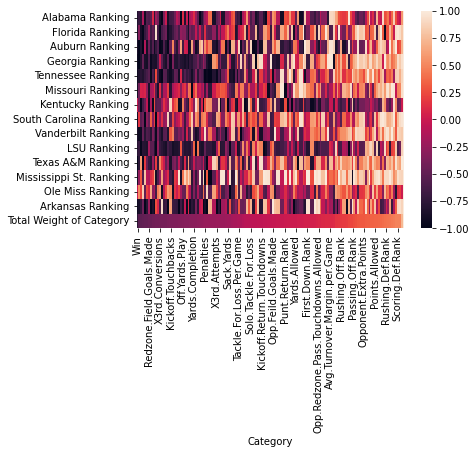

In [ ]:
sns.heatmap(sec_rankings)

In [ ]:
sec_avg = sec_average_rankings.copy()
sec_avg_rankings = sec_avg.set_index("Category")
sec_avg_rankings = sec_avg_rankings.transpose()
sec_avg_rankings

Category,Win,Redzone.Scores,Opp.3rd.Attempt,X3rd.Percent,Opp.Pass.Attempts,Total.Points,Redzone.Field.Goals.Made,Redzone.Attempts,Pass.Yards.Attempt,Off.Yards,Redzone.Points,Feild.Goals,X3rd.Conversions,Opp.4th.Attempt,PAT,Points.Per.Game,Off.Plays,Kickoff.Return.Yards,Kickoff.Touchbacks,Tackle.for.Loss.Yards,Touchdowns,Off.TDs,Pass.Yards,Assist.Tackle.For.Loss,Off.Yards.Play,Opp.Completions.Allowed,Pass.Touchdowns,Def.Plays,Off.Yards.per.Game,Penalty.Yards,Yards.Completion,Rushing.TD,Rush.Attempts,Opp.Pass.Yds.Allowed,Total.Tackle.For.Loss,Pass.Completions,Penalties,Redzone.Pass.TD,Opp.First.Down.Penalties,First.Down.Penalties,Interceptions.Thrown.x,Interceptions.Thrown.y,X3rd.Attempts,Rush.Yds,Pass.Yards.Per.Game,Opp.First.Down.Passes,First.Down.Passes,Redzone.Rush.TD,Sack.Yards,Opp.4th.Conversion,Penalty.Yards.Per.Game,Penalty.Rank,Opp.3rd.Conversion,Pass.Attempts,Tackle.For.Loss.Per.Game,Turnovers.Lost,Rushing.Yards.per.Game,Sacks,Opp.Redzone.Field.Goals.Made,Yards.Rush,Solo.Tackle.For.Loss,Kickoffs.Returned,Opp.Kickoff.Returns,Turnover.Rank,X4th.Down.Rank,Opponent.Kickoff.Return.Yards,Kickoff.Return.Touchdowns,Pass.Yards.Per.Game.Allowed,Pass.Def.Rank,Avg.Yards.Allowed.per.Punt.Return,Avg.Yards.Per.Punt.Return,Fumbles.Recovered,Opp.Feild.Goals.Made,Year,Opp.First.Downs,First.Downs,...40,Avg.Yards.per.Kickoff.Return.Allowed,Punt.Return.Rank,Punt.Return.Def.Rank,Sack.Rank,X2.Point.Conversions.Allowed,Average.Sacks.per.Game,Turnovers.Gain,Yards.Allowed,X2.Point.Conversions,Kickoff.Return.Rank,Kickoff.Return.Def.Rank,Fumbles.Lost,Opponents.Intercepted,First.Down.Rank,First.Down.Def.Rank,Opp.Punt.Returns,Punt.Returns,Opp.Pass.TDs.Allowed,Opp.Rush.Attempts,Opp.Redzone.Pass.Touchdowns.Allowed,Opp.Redzone.Attempts,Net.Punt.Return.Yards,Opp.Net.Punt.Return.Yards,X4rd.Down.Def.Rank,Yards.Completion.Allowed,Avg.Turnover.Margin.per.Game,Turnover.Margin,X4th.Percent,Tackle.for.Loss.Rank,Opp.Redzone.Rush.TD.Allowed,Opponent.4th.Percent,Rushing.Off.Rank,Opp.First.Down.Runs,First.Down.Runs,Opp.Rush.Touchdowns.Allowed,Time.of.Possession.Rank,Opp.Rush.Yards.Alloweed,Passing.Off.Rank,Opp.Redzone.Scores,Off.TDs.Allowed,Yards.Attempt.Allowed,Touchdowns.Allowed,Total.TDs.Allowed,Opponent.Extra.Points,Off.Rank,Redzone.Def.Rank,X3rd.Down.Def.Rank,Scoring.Off.Rank,Redzone.Points.Allowed,Points.Allowed,Opponent.3rd.Percent,Yards.Per.Game.Allowed,Yards.Play.Allowed,X4th.Attempts,Redzone.Off.Rank,Rushing.Def.Rank,Rush.Yards.Per.Game.Allowed,Def.Rank,Yds.Rush.Allowed,X4th.Conversions,X3rd.Down.Rank,Scoring.Def.Rank,Avg.Points.per.Game.Allowed,Loss,Ranking
Total Weight of Category,-0.75617,-0.544013,-0.508081,-0.493601,-0.483437,-0.479877,-0.458765,-0.446601,-0.423593,-0.419141,-0.40891,-0.406282,-0.401676,-0.400494,-0.399153,-0.395568,-0.377976,-0.363659,-0.363659,-0.361656,-0.35581,-0.354574,-0.338563,-0.337036,-0.334469,-0.326522,-0.323922,-0.321542,-0.307155,-0.30587,-0.304352,-0.302416,-0.286631,-0.281186,-0.272841,-0.255617,-0.249875,-0.24714,-0.241373,-0.241373,-0.238902,-0.238902,-0.232762,-0.232623,-0.23077,-0.230165,-0.230165,-0.223417,-0.210272,-0.20847,-0.184875,-0.171413,-0.169366,-0.154947,-0.145763,-0.1431,-0.109782,-0.087955,-0.081333,-0.079356,-0.074885,-0.062665,-0.062665,-0.062536,-0.059259,-0.056649,-0.056649,-0.049249,-0.042258,-0.037151,-0.037151,-0.033656,-0.03026,-0.028496,-0.018525,-0.018525,-0.017747,-0.017747,-0.006247,-0.006247,0.001104,0.001453,0.002573,0.004203,0.007694,0.020569,0.023021,0.023021,0.031043,0.031694,0.032736,0.032736,0.032895,0.032895,0.043975,0.056089,0.071826,0.073568,0.092243,0.092243,0.095663,0.10039,0.10097,0.101115,0.10765,0.150695,0.154612,0.157068,0.177025,0.182121,0.182121,0.191337,0.219173,0.22954,0.232078,0.250986,0.271745,0.291605,0.297429,0.297429,0.299775,0.317145,0.325867,0.327217,0.337442,0.340325,0.344333,0.349723,0.355805,0.369134,0.385352,0.399874,0.409453,0.415576,0.428968,0.439499,0.453695,0.477522,0.477846,0.47928,0.72968,1.0


<AxesSubplot:xlabel='Category'>

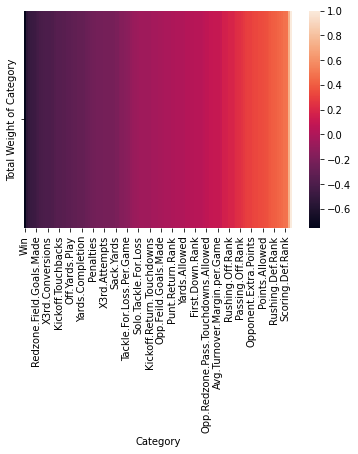

In [ ]:
sns.heatmap(sec_avg_rankings)

In [ ]:
big_ten = big_ten_rankings.copy()
big_ten = big_ten.set_index("Category")
big_ten = big_ten.transpose()
big_ten

Category,Win,Total.Points,Touchdowns,Off.TDs,PAT,Pass.Yards.Attempt,Opp.Pass.Attempts,Redzone.Scores,Rush.Attempts,First.Down.Passes,Opp.First.Down.Passes,Yards.Completion,Off.Plays,Redzone.Attempts,Off.Yards,Def.Plays,Points.Per.Game,Opp.Pass.Yds.Allowed,Rushing.TD,Pass.Yards,Opp.3rd.Attempt,Penalties,Turnover.Margin,Avg.Turnover.Margin.per.Game,Opp.Completions.Allowed,X3rd.Conversions,Off.Yards.Play,Kickoff.Touchbacks,Kickoff.Return.Yards,Pass.Touchdowns,Penalty.Yards,Assist.Tackle.For.Loss,Opp.4th.Conversion,X3rd.Percent,Opp.4th.Attempt,Redzone.Rush.TD,Opp.Redzone.Field.Goals.Made,Kickoffs.Returned,Opp.Kickoff.Returns,Opp.Feild.Goals.Made,Redzone.Points,Pass.Yards.Per.Game,Off.Yards.per.Game,Pass.Yards.Per.Game.Allowed,Opponents.Intercepted,Total.Tackle.For.Loss,Rush.Yds,Opponent.Kickoff.Return.Yards,Kickoff.Return.Touchdowns,Pass.Completions,Yards.Completion.Allowed,Redzone.Field.Goals.Made,Pass.Def.Rank,Redzone.Pass.TD,Solo.Tackle.For.Loss,Penalty.Rank,Feild.Goals,Opp.First.Down.Penalties,First.Down.Penalties,Opp.First.Downs,First.Downs,Turnovers.Gain,First.Down.Def.Rank,First.Down.Rank,Penalty.Yards.Per.Game,Redzone.Points.Allowed,Tackle.for.Loss.Yards,X3rd.Attempts,Redzone.Def.Rank,Avg.Yards.Per.Punt.Return,Avg.Yards.Allowed.per.Punt.Return,Fumbles.Recovered,Punt.Return.Def.Rank,Punt.Return.Rank,X4rd.Down.Def.Rank,Pass.Attempts,Tackle.For.Loss.Per.Game,Year,X4th.Percent,Yards.Allowed,Rushing.Yards.per.Game,Opponent.4th.Percent,Fumbles.Lost,Yards.Attempt.Allowed,X4th.Down.Rank,Tackle.for.Loss.Rank,Sack.Yards,Opp.Rush.Attempts,Rushing.Off.Rank,X4th.Conversions,Opp.Redzone.Rush.TD.Allowed,Yards.Rush,X2.Point.Conversions.Allowed,Opp.Net.Punt.Return.Yards,Net.Punt.Return.Yards,Sacks,X4th.Attempts,Opp.Pass.TDs.Allowed,Opp.Redzone.Scores,Yards.Play.Allowed,Punt.Returns,Opp.Punt.Returns,Opp.3rd.Conversion,Off.Rank,Redzone.Off.Rank,Avg.Yards.per.Kickoff.Return.Allowed,...40,Yards.Per.Game.Allowed,Time.of.Possession.Rank,Safety,Kickoff.Return.Def.Rank,Kickoff.Return.Rank,Def.Rank,Sack.Rank,Opp.Redzone.Attempts,Passing.Off.Rank,Points.Allowed,Opp.Rush.Touchdowns.Allowed,Touchdowns.Allowed,Total.TDs.Allowed,Average.Sacks.per.Game,Opp.Redzone.Pass.Touchdowns.Allowed,Opp.Rush.Yards.Alloweed,Off.TDs.Allowed,Opp.First.Down.Runs,First.Down.Runs,Turnovers.Lost,X3rd.Down.Rank,Turnover.Rank,Opponent.Extra.Points,Yds.Rush.Allowed,Scoring.Def.Rank,Interceptions.Thrown.y,Interceptions.Thrown.x,Rush.Yards.Per.Game.Allowed,Opponent.3rd.Percent,X3rd.Down.Def.Rank,Avg.Points.per.Game.Allowed,Rushing.Def.Rank,Scoring.Off.Rank,Loss,Ranking
Michigan Ranking,-0.852803,-0.640331,-0.620959,-0.571247,-0.529668,-0.899006,-0.150756,-0.518138,-0.244677,-0.200615,-0.200615,-0.207420,-0.296866,-0.536111,-0.830786,-0.026070,-0.643836,0.048001,-4.834631e-17,-0.557163,0.617802,-0.071912,-0.739795,-0.736317,-0.070871,-0.924389,-0.961497,-0.467345,-0.467345,-8.359173e-01,-0.329403,0.859772,-0.707107,-0.967629,-0.609145,-0.203186,-0.155230,0.362033,0.362033,0.206835,-0.344312,-0.557729,-0.831226,0.047882,-0.239046,0.526139,-0.379890,0.091359,0.091359,-0.745815,0.378575,-0.316228,-0.093659,-0.845626,0.035411,-0.168430,-0.396059,-0.821995,-0.821995,-0.520242,-0.520242,-2.417315e-16,-0.128154,-0.128154,-0.329722,-0.448643,0.669160,0.305424,-0.491176,-0.207256,-0.207256,0.171499,-0.041835,-0.041835,-0.377560,-0.013627,0.529627,-3.162278e-01,0.502032,-0.085779,-0.380293,-0.350306,7.921180e-01,0.100806,-0.501972,-0.469903,0.809040,0.016481,0.360518,-0.489898,8.881784e-17,-0.451197,7.850462e-17,0.148414,0.148414,8.221922e-01,-8.794277e-17,-0.500000,-0.344124,-0.113766,0.816497,0.816497,-0.460857,9.297247e-01,0.435059,-0.333289,-0.333289,-0.086848,0.191679,-4.264014e-01,-0.142267,-0.142267,0.089264,0.869645,-7.204078e-17,0.513538,-0.076116,0.089803,-0.130884,-0.130884,0.820513,-0.852803,-0.745732,-0.124035,-0.599760,-0.599760,0.746124,0.950300,0.763153,-0.051299,-0.320359,-0.129099,0.324443,0.324443,-0.746190,-0.526712,-0.742270,-0.085109,-0.552158,0.802243,0.852803,1.0
O

Text(0.5, 1.0, 'Wins Influencing Rank')

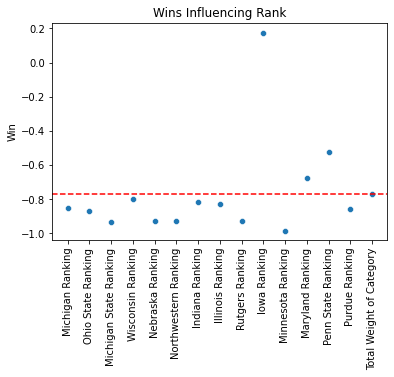

In [ ]:
wins = sns.scatterplot(x = big_ten.index, y = big_ten["Win"])
wins.axhline(y = big_ten["Win"].mean(), c='red', linestyle='dashed')
plt.xticks(rotation = 90)
plt.title("Wins Influencing Rank")


Text(0.5, 1.0, 'Losses Influencing Rank')

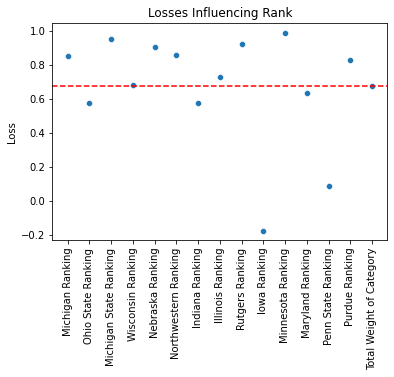

In [ ]:
losses = sns.scatterplot(x = big_ten.index, y = big_ten["Loss"])
losses.axhline(y = big_ten["Loss"].mean(), c='red', linestyle='dashed')
plt.xticks(rotation = 90)
plt.title("Losses Influencing Rank")

Text(0.5, 1.0, "Michigan's Leading Factors for a Higher Ranking in Big Ten East")

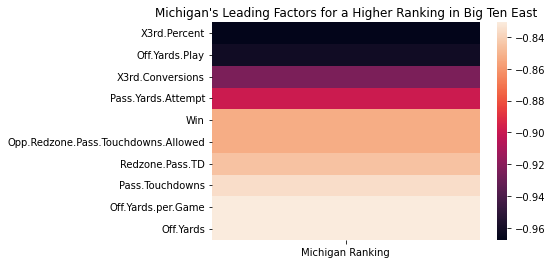

In [ ]:
umich_ranking_top_10 = umich_ranking_corr.head(10)
sns.heatmap(umich_ranking_top_10)
plt.title("Michigan's Leading Factors for a Higher Ranking in Big Ten East")

Text(0.5, 1.0, 'First Down Passes Influencing Rank')

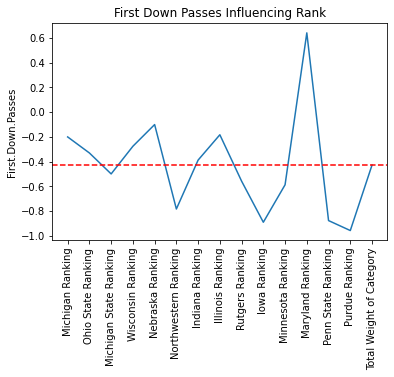

In [ ]:
first_down_passes = sns.lineplot(x = big_ten.index, y = big_ten["First.Down.Passes"])
first_down_passes.axhline(y = big_ten["First.Down.Passes"].mean(), c='red', linestyle='dashed')
plt.xticks(rotation = 90)
plt.title("First Down Passes Influencing Rank")

Text(0.5, 1.0, 'Offensive Rank Influencing Overall Rank in the Big Ten East')

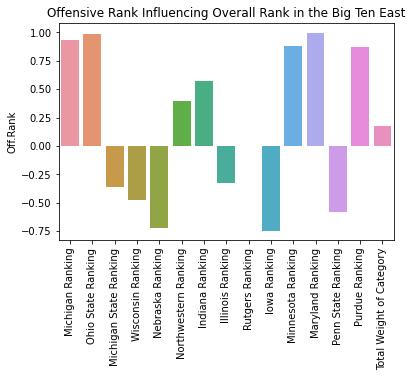

In [ ]:
sns.barplot(x = big_ten.index, y = big_ten["Off.Rank"])
plt.xticks(rotation = 90)
plt.title("Offensive Rank Influencing Overall Rank in the Big Ten East")

Text(0.5, 1.0, 'Defensive Rank Influencing Overall Rank in the Big Ten East')

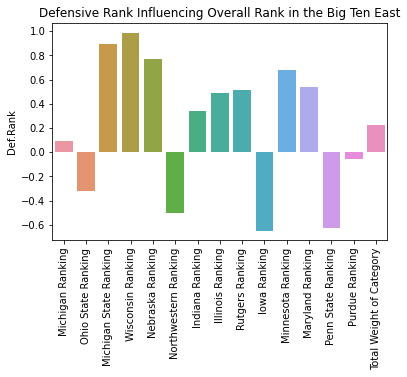

In [ ]:
sns.barplot(x = big_ten.index, y = big_ten["Def.Rank"])
plt.xticks(rotation = 90)
plt.title("Defensive Rank Influencing Overall Rank in the Big Ten East")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5015641-4d35-4402-b683-0c8b8a224cdc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>